# Pakwheels.com

## Objective 

The main objectve of this project is to scrape all the search information from pakwheels website. This program promts the user to enter url of pakwheels search reuslts then our program scrape all the pages through pagination and store these results in in .csv file and then it loads this file on dataframe and show you various visualization of data which helps you figuring out prices in various cities and how many cars are currently selling in a specific city

## Scraper

first we have to import some libraries for scraping like bs4

In [1]:
from bs4 import BeautifulSoup

- Import requests library to request html from website 
- Import Writer to write on csv file
- Import re(regular expression) for the separation of integer values from string 

In [2]:
import requests
from csv import writer
import re

Now  we have to open a csv file named as carprices and initialize the writer that write the header as an atribute names 

In [3]:
with open('carprices.csv', 'w', encoding='utf8', newline='') as f:
    thewriter = writer(f)
    header = ['Name', 'Price(lac)', 'City', 'Model', 'Mileage']
    thewriter.writerow(header)

After inserting atribute names in csv file we have to write rows in it for that we have getandwritedata(url) function which fetch data with the help or request and the pretify that with the help of beautifulsoup  and with .find() function we fetch data from classes and for price which is in "PKR 45 lac " format we apply a check and then replace extra strings like PKR  and lac with white spaces to make price to behave like integer or float(helps us in visualising data) and in the end this function return Soup of a page which is scraped and now demanding next page url as a parameter while our main loop is true

In [4]:
def getandwritedata(url):
    page= requests.get(url)
    soup= BeautifulSoup(page.content, 'html.parser')
    with open('carprices.csv', 'a', encoding='utf8', newline='') as f:
        thewriter = writer(f)
        lists= soup.find_all('div', class_="well")
        for list in lists:
                if(list.find('h3')):
                    title= list.find('h3').text.replace('\n', '')
                if(list.find('div', class_="price-details")):
                    price= list.find('div', class_="price-details").text.replace('\n', '')
                    word='PKR'
                    word2='lacs'
                    word3='Call'
                    pricefinal=0
                    if price.find(word):
                        price1= price.replace(word, "")
                        pricefinal=price1.replace(word2, "")
                    
                if(list.find('ul', class_="search-vehicle-info")):
                    city= list.find('ul', class_="search-vehicle-info").text.replace('\n', '')
                if(list.find('ul', class_="search-vehicle-info-2")):
                    otherinfo = list.find('ul', class_="search-vehicle-info-2")
                    if(otherinfo.findChildren()[0]):
                            model= otherinfo.findChildren()[0].text
                    if(otherinfo.findChildren()[1]):
                            mileage= otherinfo.findChildren()[1].text  
                    if (pricefinal != '                        Call                  '):
                        information = [title, pricefinal, city, model, mileage]
                        thewriter.writerow(information)
                    
    return soup
            
                    

This funtion takes the soup of already scraped page as a parameter and finds the next page button with the help of class "next_page" and return the href of anchor tag as url which will go into getandwritedata(url) function until the while loops break if it returns null then our main while loop breaks


In [5]:
def getnextpageurl(soup):
        page= soup.find('ul', class_="search-pagi")
        if page.find('li', class_="next_page"):
            nexturl= page.find('li', class_="next_page")
            url="https://www.pakwheels.com/"+ str(nexturl.find('a')['href'])
            return(url)
        else:
            return

### Main Function

This is our main function after executing above code we run this so that it prompts user to input url and then it goes into the loop of two functions in which one is to scrape a soup and the other is to find nextpage url and give it to scrapefunction until the null url appears and the loop breaks it means the soup is on the last page

In [6]:
print("Hey Welcome to Pakwheels Web scraper")

url=input("Kindly Enter Base URL to start scraping: ")
while True:
    soup =getandwritedata(url)
    url= getnextpageurl(soup)
    if not url:
        break
    print(url)


Hey Welcome to Pakwheels Web scraper
Kindly Enter Base URL to start scraping: https://www.pakwheels.com/used-cars/search/-/?q=suzuki+cultus+2009
https://www.pakwheels.com//used-cars/search/-/?page=2&q=suzuki+cultus+2009
https://www.pakwheels.com//used-cars/search/-/?page=3&q=suzuki+cultus+2009
https://www.pakwheels.com//used-cars/search/-/?page=4&q=suzuki+cultus+2009
https://www.pakwheels.com//used-cars/search/-/?page=5&q=suzuki+cultus+2009
https://www.pakwheels.com//used-cars/search/-/?page=6&q=suzuki+cultus+2009


Now we have csv file ready and we successfully imported all data to it so we'll read csv and store data in pandas dataframe

In [7]:
import pandas as pd

df = pd.read_csv('carprices.csv')


In [8]:
df

,Name,Price(lac),City,Model,Mileage
0,Suzuki Cultus 2009 VXRi for Sale,8.50,Karachi,2009,"96,000 km"
1,Suzuki Cultus 2009 VXRi for Sale,7.50,Karachi,2009,"85,202 km"
2,Suzuki Cultus 2009 VXRi (CNG) for Sale,8.00,Karachi,2009,"30,125 km"
3,Suzuki Cultus 2009 VXLi for Sale,9.15,Karachi,2009,"142,000 km"
4,Suzuki Mehran 2009 VXR for Sale,5.90,Fateh Jang,2009,"200,000 km"
...,...,...,...,...,...
123,Suzuki Cultus 2009 for Sale,7.30,Karachi,2009,"82,324 km"
124,Suzuki Cultus 2009 for Sale,9.00,Karachi,2009,"80,000 km"
125,Suzuki Cultus 2009 VXRi for Sale,8.50,Lahore,2009,"350,000 km"
126,Suzuki Cultus 2009 VXRi for Sale,8.75,Chichawatni,2009,"200,000 km"


- After importing all data in dataframe we have to filter rows on the basis of cities we took some major cities like Lahore, Islamabad, Karachi, Peshawar and made another dataframe named a df2 so that we get a clear scatter plot graph between city and model  
- This graph shows relation between Cities and model of the cars that in which cities which model of cars are available for sale

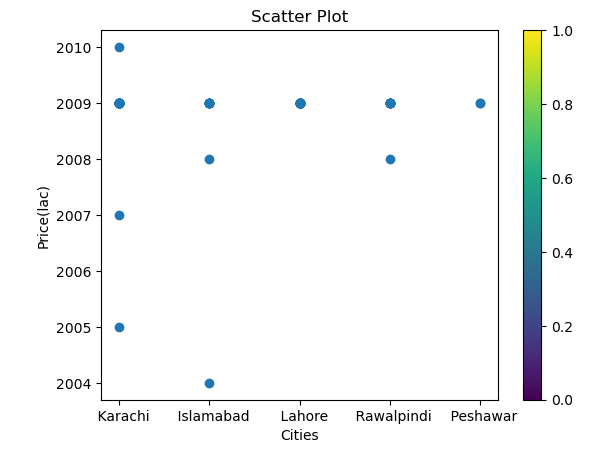

In [10]:
import matplotlib.pyplot as plt
df2=df[(df.City == '                    Karachi                  ')|(df.City == '                    Peshawar                  ') | (df.City == '                    Rawalpindi                  ') | (df.City == '                    Lahore                  ') | (df.City == '                    Islamabad                  ')]
plt.scatter(df2['City'], df2['Model'])
plt.title("Scatter Plot")
plt.xlabel('Cities')
plt.ylabel('Price(lac)')
plt.colorbar()
plt.show()


This is actually a histogram which shows the prices and models that in which prices this specifc car is selling  and of what model the majority of car is available for sale 

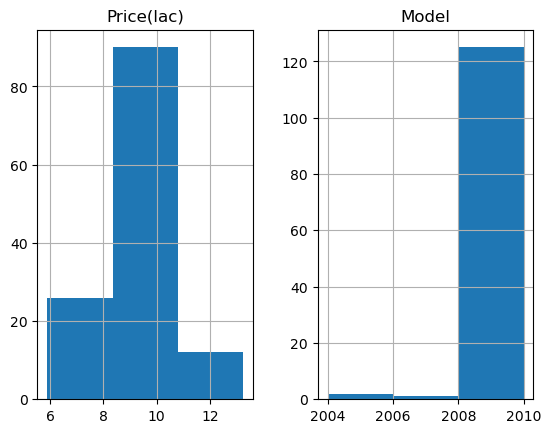

In [11]:
hist = df.hist(bins=3)

It's a bar chart which shows which city has the highest rates and which cities have a lowest rates

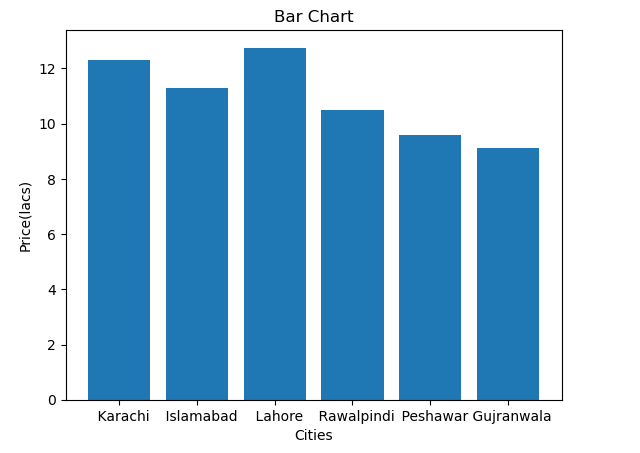

In [12]:
df2=df[(df.City == '                    Karachi                  ')| (df.City == '                    Gujranwala                  ') |(df.City == '                    Peshawar                  ') | (df.City == '                    Rawalpindi                  ') | (df.City == '                    Lahore                  ') | (df.City == '                    Islamabad                  ')]
plt.bar(df2['City'], df2['Price(lac)'])
 
plt.title("Bar Chart")
 
# Setting the X and Y labels
plt.xlabel('Cities')
plt.ylabel('Price(lacs)')
 
# Adding the legends
plt.show()

It's a lineplot with seaborn library between prices and cities which shows current prices in different cities

<AxesSubplot:xlabel='City', ylabel='Price(lac)'>

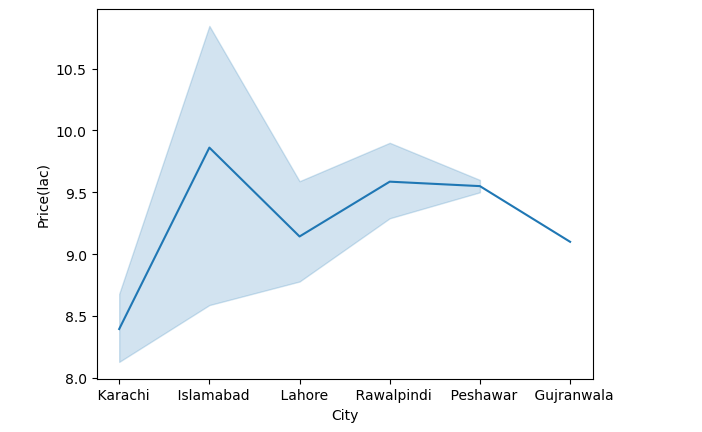

In [13]:
import seaborn as sns
sns.lineplot(x="City", y="Price(lac)", data=df2)

It's a very informative graph which shows cities against the number of ads in each cities so user get to know about that in which city this specific car is selling more 

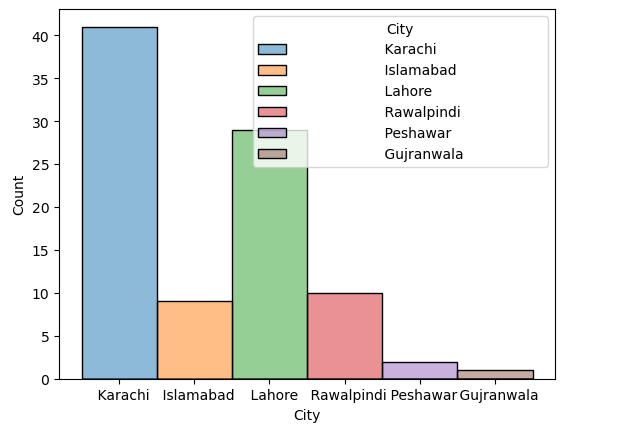

In [14]:
sns.histplot(x='City', data=df2, kde=True, hue='City')
plt.show()

## Conclusion

In the end with the help of this program user dont need to travel through all the pages of search results and does not need to manually figureout the insights about which cities have the lowest prices and in which cities more cars are selling our program will do this for him 